In [1]:
# init

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import math
import random

def distance(x,y):
    
    z = x - y
    z **= 2
    return math.sqrt(z.sum())


In [2]:
# valuable constants

np.random.seed(10)

area_size = 10

# amount of attractors and distractors
att_am = 3
dis_am = int(att_am * 4 / 3)

# minimal distance from attractor to attractor and from distractor to attractor
dist_att = int ((2 * area_size + 1)/ (math.sqrt(att_am)))
dist_dis = int(dist_att / 2)

# amount of points, amount of numbers after . (.0 rn), size of area (rn 30x30)
points_am = 400
prec = 1

print (dist_att, dist_dis)

12 6


In [3]:
# generating attraction and distraction points with the rules:
# attraction points have to be far enought from each other
# distraction points have to be far enought from each other\attraction points

attract = np.empty(2).reshape(-1, 2)

flag = True
att_iter = 0

while att_iter < att_am:
    
    we_add = np.round(2 * area_size * (0.5 - np.random.rand(2)), 
                      prec).reshape(-1, 2)
    
    if flag:
        
        attract = we_add
        flag = False
        att_iter += 1
        
    else:
        
        closest_att = distance(attract[0],we_add)
        
        for i in range(att_iter):
            
            a = distance(attract[i],we_add)
            
            if a < closest_att:
                
                closest_att = a
            
        if closest_att > dist_att:
            
            attract = np.concatenate([attract, we_add])
            att_iter += 1


distract = np.empty(2).reshape(-1, 2)

flag = True
dis_iter = 0

while dis_iter < dis_am:                
    
    we_add = np.round(2 * area_size * (0.5 - np.random.rand(2)), 
                      prec).reshape(-1, 2)
    
        
    closest_att = distance(attract[0], we_add)

    for i in range(att_iter):

        a = distance(attract[i], we_add)

        if a < closest_att:

            closest_att = a
            
    if flag:
        
        closest_dis = 2 * dist_dis
        
    else:
        
        closest_dis = distance(distract[0], we_add)
        
        for i in range(dis_iter):
            
            a = distance(distract[i], we_add)
            
            if a < closest_dis:
                
                closest_dis = a

    if closest_dis > dist_dis and closest_att > dist_dis:

        if flag:
            
            distract = we_add
            flag = False
            dis_iter += 1
        
        else:
            distract = np.concatenate([distract, we_add])
            dis_iter += 1

print(attract, "\n")
print(distract)

[[-5.4  9.6]
 [-2.7 -5. ]
 [ 6.6  8.2]] 

[[ 9.9 -0.2]
 [ 1.2  1.3]
 [-8.2  3.6]
 [ 7.7 -6.6]]


In [4]:
# generating points with the interpolary rule : random(0,1) < chance
# chance is (b/(a+b))^3
# b - distance to closest distractor, a - distance to closest attractor

points = np.empty(2).reshape(-1, 2)

flag = True
iterator = points_am

while iterator > 0:
    
    we_add = np.round(2 * area_size * (0.5 - np.random.rand(2)),
                      prec).reshape(-1,2)
    
    closest_att = distance(attract[0], we_add)
    for i in range(att_am):
        
        a = distance(attract[i], we_add)
        
        if a < closest_att:
            
            closest_att = a
        
    closest_dis = distance(distract[0], we_add)
    for i in range(dis_am):
        
        a = distance(distract[i], we_add)
        
        if a < closest_dis:
            
            closest_dis = a
            
    chance = (closest_dis / (closest_dis + closest_att)) ** 4
    
    if chance > random.random() and closest_att < closest_dis:
        
        if flag:
            
            points = we_add
            flag = False
        
        else:
            
            points = np.concatenate([points, we_add])
            
            
        iterator -= 1

            
            
points
        

array([[  3.1,   9.1],
       [ -7.6,  -5.3],
       [ -1.7,   9.3],
       [  7. ,   6.3],
       [ -8.4,  -8.5],
       [ -1.7,  -4.2],
       [  6.5,   9.7],
       [ -3.1,  -6.1],
       [ -6.3,  -5.7],
       [  2.1,  -7.3],
       [  6.3,   8.6],
       [ -0.2,  -7.8],
       [ -8.8,  -4.1],
       [  1.9,   7.4],
       [ -7.6,  -7.6],
       [  3.1,   9.6],
       [ -0.2,  -9.9],
       [ -1. ,  -6.8],
       [ -1.6,   6.3],
       [ -2.3,  -7.7],
       [ -0.3,  -2.5],
       [ -2.3,  -6.9],
       [ -0.8,  -5.1],
       [ -2.3,  -6.8],
       [  4.6,   5.3],
       [ -3.4,  -4.1],
       [ -0.5,  -5.7],
       [ -0.1,  -9.3],
       [ -6.1,  -8.6],
       [ -0.5,  -6.1],
       [  4.1,   6.3],
       [  8.4,   8.4],
       [ -2.3,   7.2],
       [ -8.7,  -3.1],
       [  3.9,   5.7],
       [ -3. ,   5. ],
       [ -7.3,  -2.7],
       [  5.5,   9.9],
       [ -4.3,   6.9],
       [ -2.6,  -2.7],
       [ -8.1,  -5.9],
       [ -2.9,   9.4],
       [ -5.1,  -7.8],
       [  6

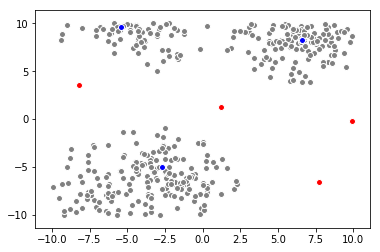

In [5]:
# showing what we built, blue dots are attraction centers
# red - distraction, gray - ordinary points

fig = plt.figure()


for i in range(points_am):
    
    plt.scatter(points[i][0],
                points[i][1], 
                color = 'gray', 
                edgecolors = 'white')
    

for i in range(att_am):
    
    plt.scatter(attract[i][0],
                attract[i][1], 
                color = 'blue', 
                edgecolors = 'white')
    
for i in range(dis_am):
    
    plt.scatter(distract[i][0],
                distract[i][1], 
                color = 'red', 
                edgecolors = 'white')
    


In [6]:
# generating range matrix (symmetric)
# points - all points we have

a = points.T

x = (a[0] - a[0].reshape(-1, 1)) ** 2
y = (a[1] - a[1].reshape(-1, 1)) ** 2

len = np.sqrt(x + y)

print(len, "\n", len.max())

[[ 0.         17.94017837  4.80416486 ... 15.52610705 15.37335357
  12.14619282]
 [17.94017837  0.         15.74706322 ...  4.21070065  6.20725382
   6.8       ]
 [ 4.80416486 15.74706322  0.         ... 14.40069443 14.90301983
  11.40043859]
 ...
 [15.52610705  4.21070065 14.40069443 ...  0.          2.0880613
   3.41320963]
 [15.37335357  6.20725382 14.90301983 ...  2.0880613   0.
   3.50570963]
 [12.14619282  6.8        11.40043859 ...  3.41320963  3.50570963
   0.        ]] 
 27.014810752622346


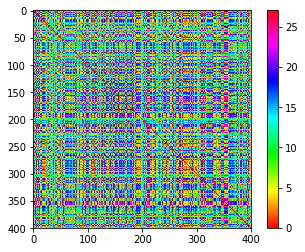

In [7]:
# visualisation of range matrix, named len

plt.imshow(len, cmap = 'hsv')
plt.colorbar(orientation = 'vertical', pad = 0.05)

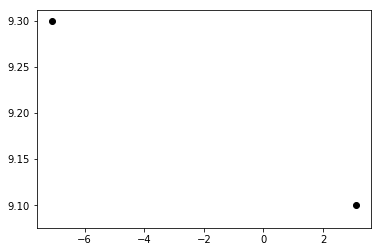

In [66]:
clusters_am = 2

cluster_centers = np.zeros(2 * clusters_am).reshape(-1, 2)

for i in range(clusters_am):
    
    if i == 0:
        
        cluster_centers[0] = points[0]
        currently_in[0] = 0
        #print(points[0])
        
    else:
        
        range_map = (points.T[0] - cluster_centers.T[0][:i].reshape(-1, 1)) ** 2 + (points.T[1] - cluster_centers.T[1][:i].reshape(-1, 1)) ** 2
        dist = np.min(range_map, axis = 0)
        
        sum = np.sum(dist)
        rnd = random.random() * sum
        
        sum1 = 0
        chos = 0
        
        while sum1 < rnd:
            
            sum1 += dist[chos]
            chos += 1
            
        cluster_centers[i] = points[chos]

fig = plt.figure()

for i in range(clusters_am):
    plt.scatter(cluster_centers[i][0],
                cluster_centers[i][1],
                color = 'black')
    


[[-3.56512821 -6.20615385]
 [ 2.45121951  8.15219512]]


C:\Users\maxko\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


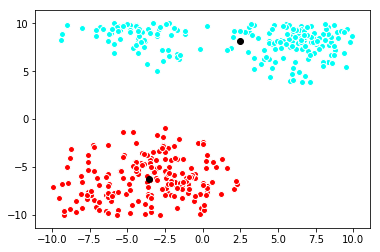

In [69]:
def KMeans(clusters_am):
    
    
    cluster_centers = np.zeros(2 * clusters_am).reshape(-1, 2)
    points_associations = np.zeros(points_am, dtype = 'int') - 1

    for i in range(clusters_am):

        if i == 0:

            cluster_centers[0] = points[0]
            currently_in[0] = 0
            #print(points[0])

        else:

            range_map = (points.T[0] - cluster_centers.T[0][:i].reshape(-1, 1)) ** 2 + (points.T[1] - cluster_centers.T[1][:i].reshape(-1, 1)) ** 2
            dist = np.min(range_map, axis = 0)

            sum = np.sum(dist)
            rnd = random.random() * sum

            sum1 = 0
            chos = 0

            while sum1 < rnd:

                sum1 += dist[chos]
                chos += 1

            cluster_centers[i] = points[chos]

    
    outer_flag = True
    while outer_flag:
        
        for i in range(points_am):
        
            m_range = 2 * area_size + 1
        
            for j in range(clusters_am):
            
                curr = distance(points[i],cluster_centers[j])
            
                if  curr < m_range:
                
                    m_range = curr
                    points_associations[i] = j
                
        new_centers = np.empty(2 * clusters_am).reshape(-1, 2)
                
        for j in range(clusters_am):
        
            curr_pos = np.zeros(2)
            num = 0
        
            for i in range(points_am):
            
                if points_associations[i] == j:
                
                    curr_pos += points[i]
                    num += 1
                
            new_centers[j] = curr_pos / num
        
        new_flag = True
    
        for j in range(clusters_am):
        
            if not np.array_equal(cluster_centers[j], new_centers[j]):
            
                cluster_centers[j] = new_centers[j]
                new_flag = False
            
        outer_flag = not new_flag
        
    colors = [cm.hsv(i/(clusters_am)) for i in range(clusters_am)]
    
    print(cluster_centers)
    
    fig = plt.figure()

    for i in range(points_am):

        plt.scatter(points[i][0],
                    points[i][1], 
                    color = colors[points_associations[i]], 
                    edgecolors = 'white')

    for i in range(clusters_am):

        plt.scatter(cluster_centers[i][0],
                    cluster_centers[i][1],
                    color = "black")
        
    fig.show()
        
    return cluster_centers, points_associations

a, b = KMeans(2)

In [ ]:
# not so bad looking colorisation

colors = [cm.hsv(i/(clusters_am)) for i in range(clusters_am)]

fig = plt.figure()

for i in range(points_am):
    
    plt.scatter(points[i][0],
                points[i][1], 
                color = colors[p_association[i]], 
                edgecolors = 'white')
    
for i in range(clusters_am):
    
    plt.scatter(cluster_cent[i][0],
                cluster_cent[i][1],
                color = "black")

In [ ]:
# clusterisation attempt
# points - all points we have
# attract - all attraction points
# distract - all distraction points

cluster_crit = int(area_size / 2)

p_association = np.zeros(points_am, dtype = int) - 1

coord_sum = np.zeros(2).reshape(-1, 2) + points[0]
elems_am = np.ones(1)

clusters_am = 1
p_association[0] = 0
cluster_cent = np.zeros(2).reshape(-1, 2) + points[0]


for i in range(points_am - 1):
    
    k = i + 1
          
    min_len = distance(cluster_cent[0],points[k])
    hold = 0
    
    for j in range(clusters_am):
        
        a = distance(cluster_cent[j],points[k])
        
        if a < min_len:
            
            min_len = a
            hold = j
            
    if min_len > cluster_crit:
        
        p_association[k] = clusters_am
        clusters_am += 1
        
        elems_am = np.concatenate([elems_am, np.ones(1)])
        cluster_cent = np.concatenate([cluster_cent, 
                                       np.zeros(2).reshape(-1, 2) + points[k]])
        coord_sum = np.concatenate([coord_sum, 
                                    np.zeros(2).reshape(-1, 2) + points[k]])
        
    else:
        
        p_association[k] = hold
        elems_am[hold] += 1
        coord_sum[hold] += points[k]
        
        cluster_cent[hold] = coord_sum[hold] / elems_am[hold]

        
print(elems_am, "\n", clusters_am, "\n", cluster_cent)

In [ ]:
# clusters unition
# cluster_cent - np. array (num, 2) of centers
# clusters_am - starting amount of clusters
# elems_am - amount of dots in each cluster
# points - all dots we have generated
# p_association - cluster associations for each dot

points_clust =  np.zeros(clusters_am)
range_cent = np.zeros(clusters_am)

for i in range(points_am):
    
    points_clust[p_association[i]] += 1
    range_cent[p_association[i]] += distance(cluster_cent[p_association[i]], points[i])
    
range_cent /= points_clust

#maybe can be useful

In [ ]:
# another way of generating clusters, using len matrix
# points - all the dots
# len - len_matrix

choosen_am = 1
current = 0

crit_size = int(area_size / 2)

p_association = np.zeros(points_am) - 1
clusters_am = 1
p_association[0] = 0

cluster_cent = np.zeros(2).reshape(-1, 2)

while choosen_am < points_am:
    
    sum_pos = np.zeros(2) + points[current]
    num = 1
    
    for i in range(points_am):
        
        if p_association[i] == -1:
            
            if distance(points[current], points[i]) < crit_size:
                
                p_association[i] += clusters_am
                sum_pos += points[i]
                num += 1
            
    choosen_am += num - 1
    cluster_cent[clusters_am - 1] = sum_pos / num
    
    if choosen_am < points_am:
        
        cluster_cent = np.concatenate([cluster_cent, np.zeros(2).reshape(-1, 2)])
        clusters_am += 1
        
        for i in range(points_am):
            
            if p_association[i] == -1:
                
                current = i
                cluster_cent[clusters_am - 1] += points[i]
                choosen_am += 1
    
    
print(clusters_am)            

#give up with it for now

In [ ]:
# reducing amount of clusters
# cluster_cent - np. array (num, 2) of centers
# clusters_am - starting amount of clusters
# elems_am - amount of dots in each cluster
# points - all dots we have generated
# p_association - cluster associations for each dot

flag = True

while flag:
    
    victim = argmin(elems_am)
    
    for i in range(clusters_am):
        
        check = []
        
        if i != victim and distance(cluster_cent[victim],
                                    cluster_cent[i]) < cluster_crit:
            
            check.append(i)
    
    for i in check:
    
        pos = np.zeros(2).reshape(-1, 2)
        num = 0
    
        flag1 = True
    
        for j in range(amount):
            
            if p_association[j] == i or victim:
                
                pos += points[j]
                num += 1
                
        cent_coord = pos / num
    
        for j in range(amount):
            
            if p_association[j] == i or victim:
                
                if distance(points[j], cent_coord) > cluster_crit:
                    
                    break;
                    # not finished, give up with it

In [ ]:
# KMeans

flag = True

while flag:
    
    for i in range(points_am):
        
        m_range = 2 * area_size
        
        for j in range(clusters_am):
            
            curr = distance(points[i],cluster_cent[j])
            
            if  curr < m_range:
                
                m_range = curr
                p_association[i] = j
                
    new_centers = np.empty(2 * clusters_am).reshape(-1, 2)
                
    for j in range(clusters_am):
        
        curr_pos = np.zeros(2)
        num = 0
        
        for i in range(points_am):
            
            if p_association[i] == j:
                
                curr_pos += points[i]
                num += 1
                
        new_centers[j] = curr_pos / num
        
    new_flag = True
    
    for j in range(clusters_am):
        
        if not np.array_equal(cluster_cent[j], new_centers[j]):
            
            cluster_cent[j] = new_centers[j]
            new_flag = False
            
    flag = not new_flag
    


In [ ]:
# first generation, will be reduced

colors = [cm.hsv(i/(clusters_am)) for i in range(clusters_am)]

fig = plt.figure()

for i in range(points_am):
    
    plt.scatter(points[i][0],
                points[i][1], 
                color = colors[p_association[i]], 
                edgecolors = 'white')
    
for i in range(clusters_am):
    
    plt.scatter(cluster_cent[i][0],
                cluster_cent[i][1],
                color = "black")
    

